<a href="https://colab.research.google.com/github/sowmya2016/sowmya2016/blob/main/SMDM_Project_Sowmya_Subramaniam_Nov_12_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


uploaded = files.upload()

Saving austo_automobile.csv to austo_automobile.csv


In [5]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('austo_automobile.csv')
# Display the first few rows of the DataFrame
print(df.head())

# Get basic statistics about the data
print(df.describe())
# Check the data structure (number of rows and columns)
print("Data structure: ", df.shape)
print("No. of rows: ",df.shape[0], "\n""No. of columns: ",df.shape[1])

# Check data types of each column
print("Data types: \n", df.dtypes)
# Check for missing values
print(df.isnull().sum())

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]


# Filter rows where the car Make is an SUV


suv_data = df[df['Make'] == 'SUV']
# Group the filtered SUV data by Gender
gender_suv_counts = suv_data['Gender'].value_counts()

# Calculate the percentage of men and women who chose SUVs
total_counts = gender_suv_counts.sum()
men_percentage = (gender_suv_counts.get('Male', 0) / total_counts) * 100
women_percentage = (gender_suv_counts.get('Female', 0) / total_counts) * 100

print(f"Percentage of Men who chose SUVs: {men_percentage:.2f}%")
print(f"Percentage of Women who chose SUVs: {women_percentage:.2f}%")

   Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SU

In [6]:
#Imputing data into Gender column where the values are missing
mode1=df['Gender'].mode().values[0]
df['Gender']=df['Gender'].replace(np.nan,mode1)
#df['Gender'].fillna('Male',inplace= True)
print(df.value_counts('Gender'))
df.groupby('Gender').agg(Mean_Age=('Age','mean'),Median_Age=('Age','median')).round(2)

Gender
Male      1252
Female     327
Femal        1
Femle        1
dtype: int64


,Mean_Age,Median_Age
Gender,,
Femal,53.00,53.0
Female,39.48,39.0
Femle,40.00,40.0
Male,29.92,28.0


In [7]:
# Imputing values in the Partner Salary column and replacing null values with zeros
df['Partner_salary']=df['Total_salary']-df['Salary']
df['Partner_salary'].fillna(0,inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1581 non-null   int64 
 1   Gender            1581 non-null   object
 2   Profession        1581 non-null   object
 3   Marital_status    1581 non-null   object
 4   Education         1581 non-null   object
 5   No_of_Dependents  1581 non-null   int64 
 6   Personal_loan     1581 non-null   object
 7   House_loan        1581 non-null   object
 8   Partner_working   1581 non-null   object
 9   Salary            1581 non-null   int64 
 10  Partner_salary    1581 non-null   int64 
 11  Total_salary      1581 non-null   int64 
 12  Price             1581 non-null   int64 
 13  Make              1581 non-null   object
dtypes: int64(6), object(8)
memory usage: 173.0+ KB


In [8]:
#Checking if the partner salary is zero where partner working is 'No'.
print("Partner working status",df.value_counts('Partner_working'))
len(df[df['Partner_salary']==0])

Partner working status Partner_working
Yes    868
No     713
dtype: int64


713

<ipython-input-24-db63259cf3f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


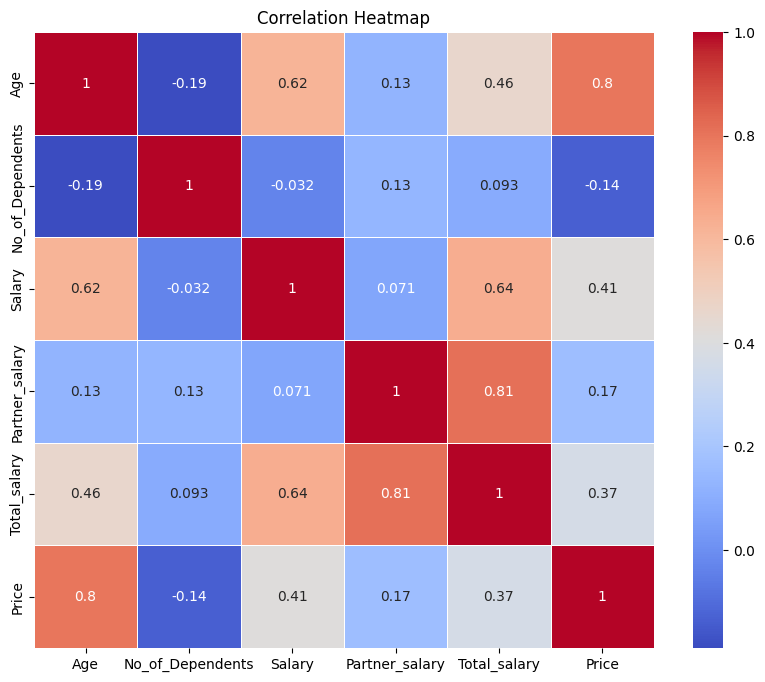

In [ ]:
correlation_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

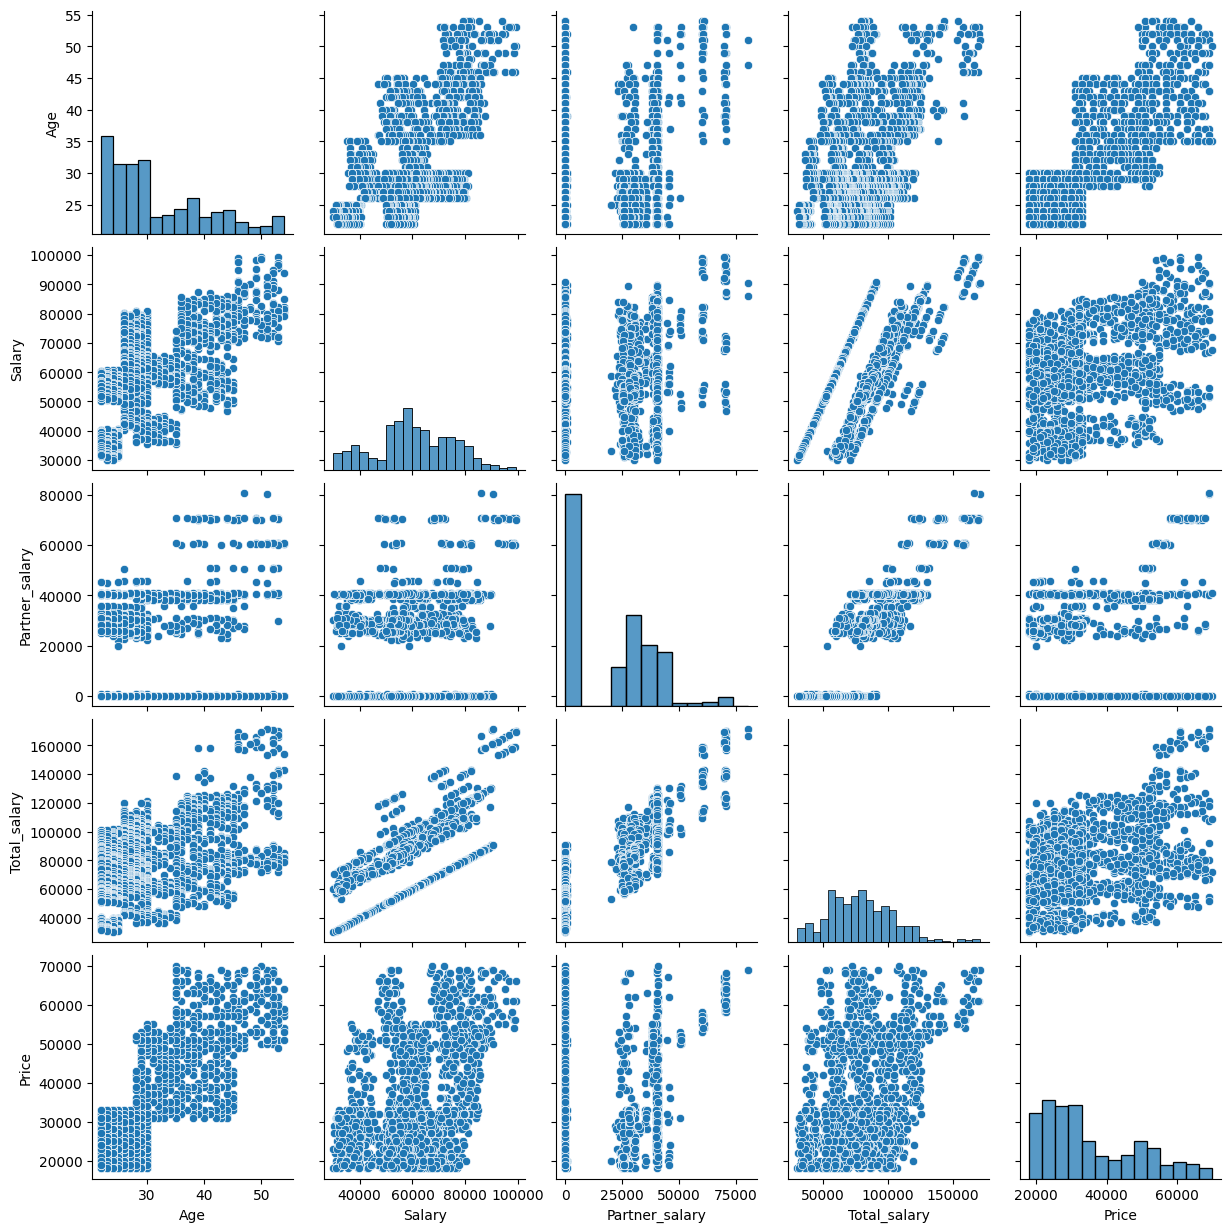

In [ ]:
sns.pairplot(df, vars=['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price'])
plt.show()



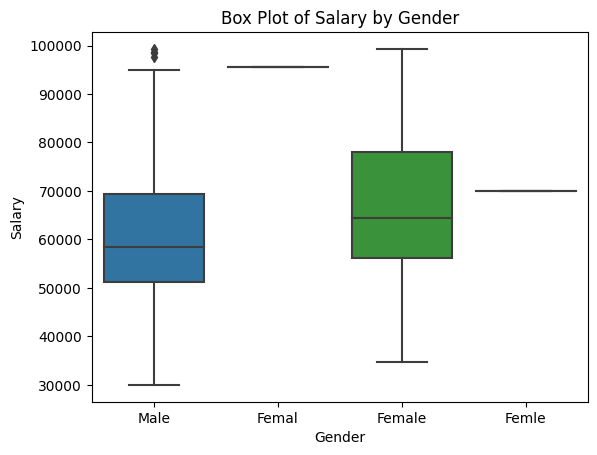

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Relationship between 'Gender' and 'Salary'
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title("Box Plot of Salary by Gender")
plt.show()

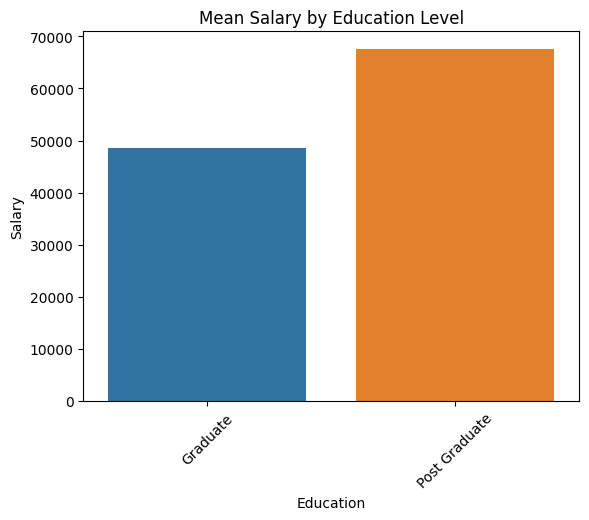

In [ ]:
# Example: Relationship between 'Education' and 'Salary'
education_salary = df.groupby('Education')['Salary'].mean().reset_index()
sns.barplot(x='Education', y='Salary', data=education_salary)
plt.title("Mean Salary by Education Level")
plt.xticks(rotation=45)
plt.show()

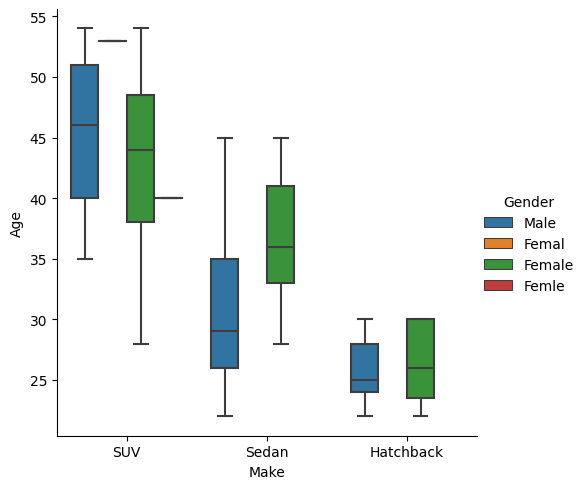

In [9]:
#Looking at relation between Age and Make os cars
sns.catplot(data=df, x="Make", y="Age", hue="Gender", kind="box")

In [ ]:
import pandas as pd
import scipy.stats as stats

# Perform a two-sample t-test
with_personal_loan = df[df['Personal_loan'] == 1]['Salary']
without_personal_loan = df[df['Personal_loan'] == 0]['Salary']

t_statistic, p_value = stats.ttest_ind(with_personal_loan, without_personal_loan)
df.dropna(subset=['Salary'], inplace=True)  # Remove rows with missing 'Salary' values
# Set your chosen alpha level (significance level)
alpha = 0.05

# Compare the p-value to the alpha level
if p_value < alpha:
    print("Reject the null hypothesis. The means are different.")
else:
    print("Fail to reject the null hypothesis. There's no significant difference.")

print(f"Calculated p-value: {p_value:.4f}")


# Filter rows where individuals are "Salaried"
salaried_data = df[df['Profession'] == 'Salaried']


# Calculate the likelihood of salaried individuals buying a Sedan
total_salaried_count = len(salaried_data)
sedan_count = len(salaried_data[salaried_data['Make'] == 'Sedan'])
likelihood = (sedan_count / total_salaried_count) * 100

print(f"Likelihood of a salaried person buying a Sedan: {likelihood:.2f}%")

Fail to reject the null hypothesis. There's no significant difference.
Calculated p-value: nan
Likelihood of a salaried person buying a Sedan: 44.20%


In [ ]:
# Count the number of salaried males who chose SUVs and Sedans
salaried_males = salaried_data[salaried_data['Gender'] == 'Male']
suv_count = len(salaried_males[salaried_males['Make'] == 'SUV'])
sedan_count = len(salaried_males[salaried_males['Make'] == 'Sedan'])

# Calculate the likelihood of a salaried male buying an SUV over a Sedan
likelihood = (suv_count / (suv_count + sedan_count)) * 100

print(f"Likelihood of a salaried male buying an SUV over a Sedan: {likelihood:.2f}%")

Likelihood of a salaried male buying an SUV over a Sedan: 23.35%


So this CONTRADICTS  Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale

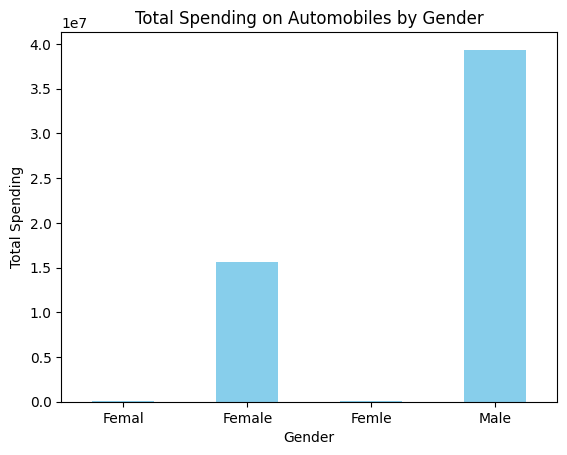

In [ ]:
# Group the data by Gender and calculate the total amount spent
gender_spending = df.groupby('Gender')['Price'].sum()
import matplotlib.pyplot as plt

# Create a bar plot to visualize spending by gender
gender_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

There are significant differences in the total spending on automobiles between different genders.Men tend to spend more than women on automobiles


In [ ]:
# Filter the data to include only individuals who took a personal loan
personal_loan_data = df[df['Personal_loan'] == 1]

# Calculate the total amount spent on purchasing automobiles by these individuals
total_spent_on_automobiles = personal_loan_data['Price'].sum()

print(f"Total amount spent on automobiles by individuals who took a personal loan: ${total_spent_on_automobiles:.2f}")

Total amount spent on automobiles by individuals who took a personal loan: $0.00


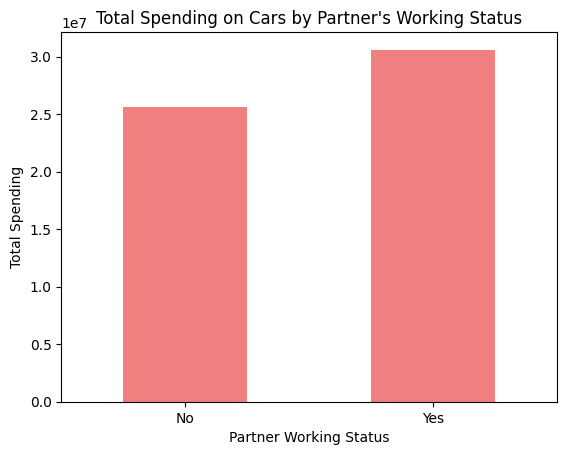

In [ ]:
# Group the data by the "Partner_working" column and calculate the total spending on cars
partner_spending = df.groupby('Partner_working')['Price'].sum()
import matplotlib.pyplot as plt

# Create a bar plot to visualize spending on cars based on partner's working status
partner_spending.plot(kind='bar', color='lightcoral')
plt.title('Total Spending on Cars by Partner\'s Working Status')
plt.xlabel('Partner Working Status')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()

There are significant differences in total spending on cars between individuals with a working partner and those without.
Individuals with a working partner tend to spend more  on cars compared to those without.This indicates the influence of a working partner on the purchase of higher-priced cars.







Categorical Variables:

Gender,Profession,Marital status,education, personal loan, house loan, partner working, Make : You can count the number in the dataset and create a bar plot to visualize them.

In [ ]:
gender_counts = df['Gender'].value_counts()


numerical variables:
Age, No_of_Dependents, Salary, Partner_Salary, Total_Salary :You can calculate Mean, median , mode for these

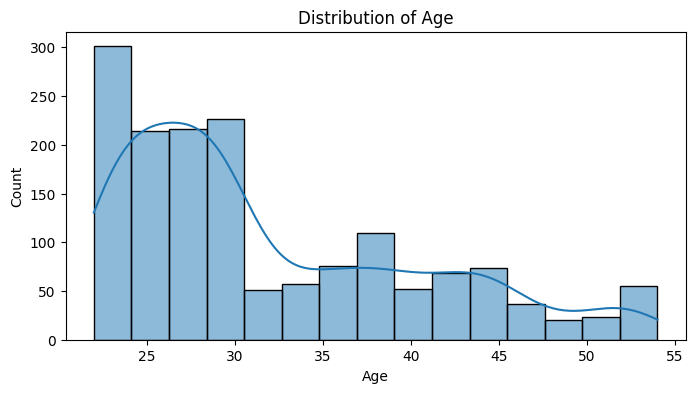

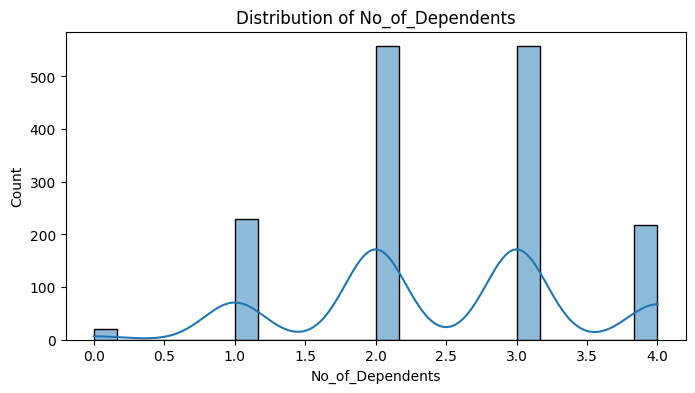

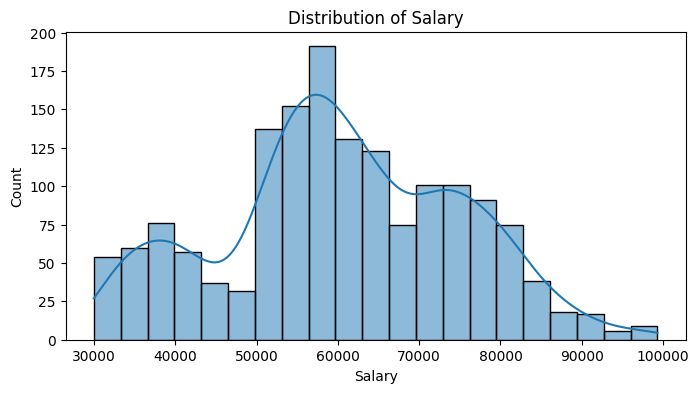

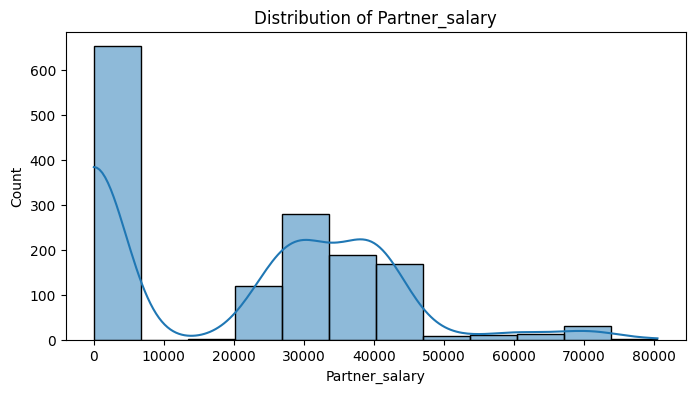

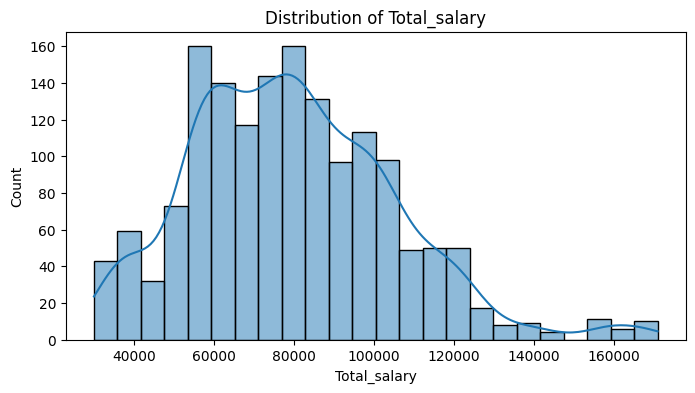

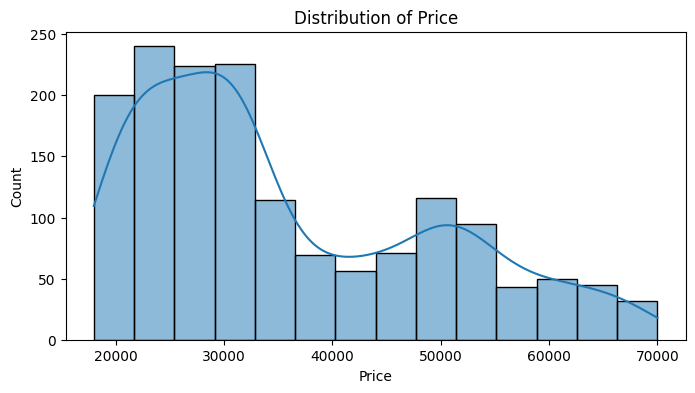

In [ ]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std = df['Age'].std()

import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']

for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

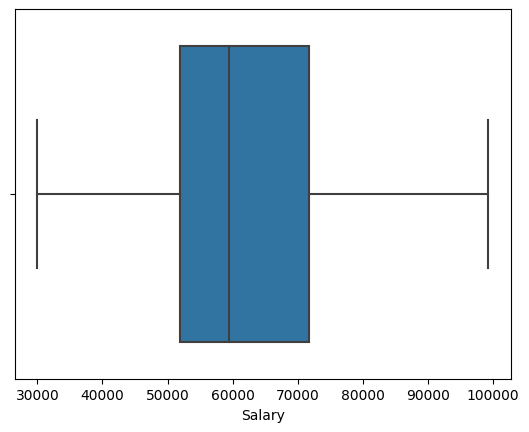

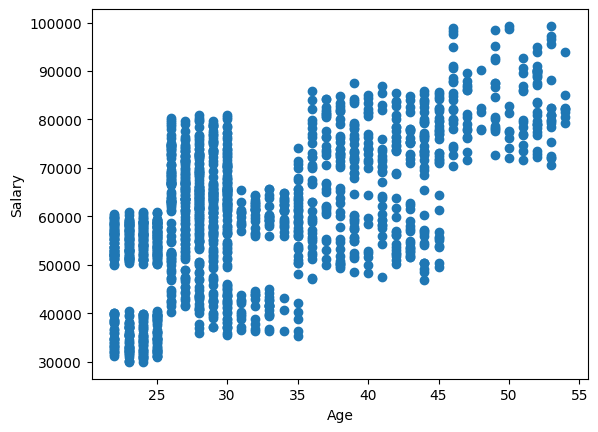

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.boxplot(data=df, x='Salary')
plt.show()
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
from scipy import stats

z_scores = stats.zscore(df['Salary'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = (df['Salary'] < lower_fence) | (df['Salary'] > upper_fence)
from scipy import stats

z_scores = stats.zscore(df[numerical_vars])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Remove outliers
df = df[~outliers]
